In [1]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15, 'lines.linewidth': 2, 'axes.spines.top': False, 'axes.spines.right': False, 'savefig.dpi': 1200})
import numpy as np
import torch
from stable_baselines3 import PPO

from boxforage.environments import BoxForagingEnvironment
from boxforage.utils import plot_box_states, plot_experience, plot_box_beliefs

# Two Box Foraging Experiment

There are two boxes in the environment, each uses its own color cue to indicate food availability. An agent can move to different locations and push button if it is at a box.

In [2]:
boxes_spec = {
    'num_boxes': 2,
    'p_appear': 0.2, 'p_vanish': 0.1,
}
num_steps = 40

## High signal-to-noise observation

In [3]:
boxes_spec.update({
    'p_true': 0.9, 'p_false': 0.1,
})
env = BoxForagingEnvironment(boxes_spec=boxes_spec)

### Gameplay of a random agent

mean reward -0.23


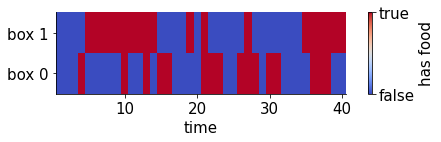

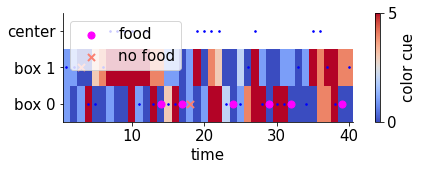

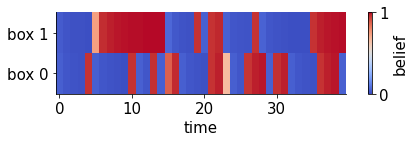

In [4]:
trial = env.run_one_trial(num_steps=num_steps)

print('mean reward {:.2f}'.format(trial['rewards'].mean()))
fig, ax = plot_box_states(trial)
fig, ax = plot_experience(trial, num_grades=env.boxes_spec['num_grades'])
fig, ax = plot_box_beliefs(trial)

### Gameplay of a trained PPO agent

mean reward 2.02


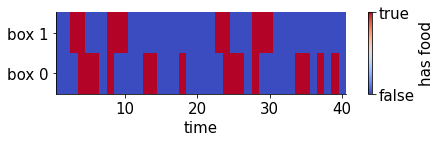

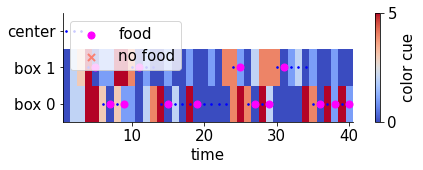

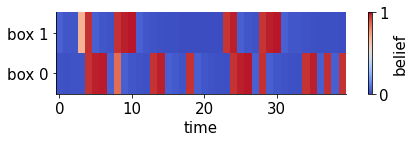

In [5]:
algo = PPO('MlpPolicy', env, device='cpu')
algo.policy.load_state_dict(torch.load('algo_0901.pt'))

trial = env.run_one_trial(algo=algo, num_steps=num_steps)

print('mean reward {:.2f}'.format(trial['rewards'].mean()))
fig, ax = plot_box_states(trial)
fig, ax = plot_experience(trial, num_grades=env.boxes_spec['num_grades'])
fig, ax = plot_box_beliefs(trial)

## Low signal-to-noise observation

In [6]:
boxes_spec.update({
    'p_true': 0.6, 'p_false': 0.4,
})
env = BoxForagingEnvironment(boxes_spec=boxes_spec)

### Gameplay of a random agent

mean reward -1.57


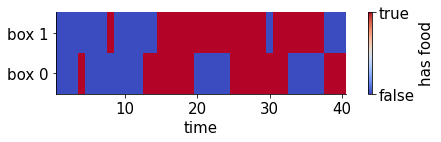

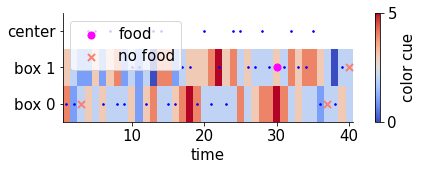

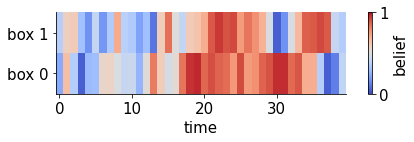

In [7]:
trial = env.run_one_trial(num_steps=num_steps)

print('mean reward {:.2f}'.format(trial['rewards'].mean()))
fig, ax = plot_box_states(trial)
fig, ax = plot_experience(trial, num_grades=env.boxes_spec['num_grades'])
fig, ax = plot_box_beliefs(trial)

### Gameplay of a trained PPO agent

mean reward 0.47


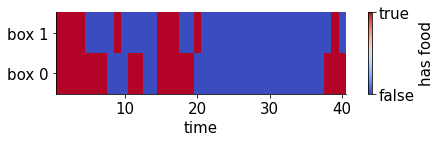

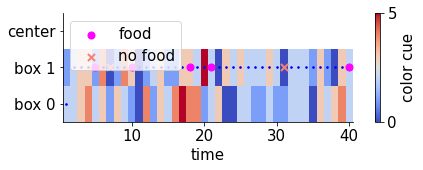

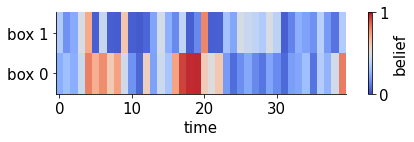

In [8]:
algo = PPO('MlpPolicy', env, device='cpu')
algo.policy.load_state_dict(torch.load('algo_0604.pt'))

trial = env.run_one_trial(algo=algo, num_steps=num_steps)

print('mean reward {:.2f}'.format(trial['rewards'].mean()))
fig, ax = plot_box_states(trial)
fig, ax = plot_experience(trial, num_grades=env.boxes_spec['num_grades'])
fig, ax = plot_box_beliefs(trial)